## **FTK (FOR THE KIDS) - CMPINF0010 FINAL PROJECT**


*INTRODUCTION*      
When considering what would qualify a neighborhood as being the best, we decided that it should be based on each neighborhood's funness level. And what group of people are the best at decided whether something is fun or not? Kids.

Using the datasets provided by the WPRDC, we narrowed down the factors for the funnest neighborhood in Pittsburgh to:
* pools
* parks
* playgrounds


*THE METRIC*    
We decided the best way of judging which neighborhood won each factor differed between them. 

Courts and rinks were decided simply based on which neighborhood had the highest count. 

Pools were decided based how much pool there was per person in each neighborhood. For example a small populated neighborhood with a 300 square meter pool would win over a largely populated one with the same area. These were than given scores based on their position. The largest liters per person is given 15 points, 2nd place gets 14 points, and so on.

*THE DATA*    
First we import pandas, geopandas, and matplotlib. Also, we set the style and color theme of future graphs. Then we import the data as follows:         

courtsnrinks --> this is the courts and rinks data         
courtsnrinks_dict --> this is a dictionary from the courtsnrinks data    
population --> this is the population data        
population_dict --> this is the dictionary from the population data         
pools --> this is the pool data        
pools_dict --> this is the dictionary from the pools data     
poolcscap_dict --> this is the dictionary from the pool capacity data         
finalscores --> the final score ranking          
    

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
colors = ['darkseagreen', 'steelblue', 'lightcoral', 'slategrey', 'lightsteelblue']

courtsnrinks = pd.read_csv('https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227')
courtsnrinks_dict = dict()
population = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
population_dict = dict()
pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
pools_dict = dict()
poolscap_dict = dict()

*MAPS*         
Here we set the base maps of the neighborhoods in the Pittsburgh areas.

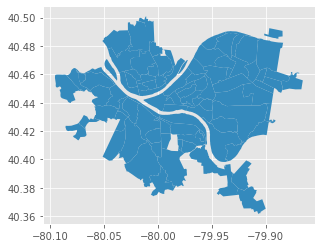

In [5]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

**PART ONE: COURTS AND RINKS**     
Here we make the courtsnrinks data frame easier to read.      
We iterate through the data frame and make a new item whenever it is a new neighborhood. If the neighborhood is already in the dictionary, we will just add one to the total of the item.     

In [6]:
for i in range(len(courtsnrinks)):

    item = courtsnrinks.loc[i, 'neighborhood']
    
    if item in courtsnrinks_dict: 
        courtsnrinks_dict[item] += 1 
    else:
        courtsnrinks_dict[item] = 1 

Now we convert the dictionary back to a series.

In [7]:
courtsnrinks_series = pd.Series(courtsnrinks_dict, name = "Courts")

Than we sort the values from greatest to least and print out the 10 neighborhoods with the most courts and parks.

In [8]:
courtsnrinks_series.sort_values(ascending=False)[:10]

Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
Allegheny Center        9
Troy Hill               8
Beechview               7
South Side Slopes       6
Lower Lawrenceville     6
Name: Courts, dtype: int64

Now lets make a bar graph using plot.bar() to visually represent the top 10 data.

Text(0, 0.5, '# of Courts/Rinks')

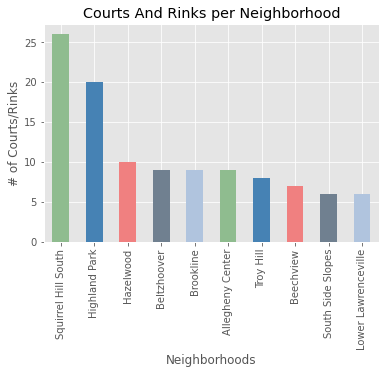

In [9]:
courtsnrinks_series.sort_values(ascending=False)[:10].plot.bar(color=colors)
plt.title('Courts And Rinks per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('# of Courts/Rinks')

*MAPS*         
Now we are going to plot the positions of the courts and rinks onto a map. This is not exactly necessary, but it is kinda cool.

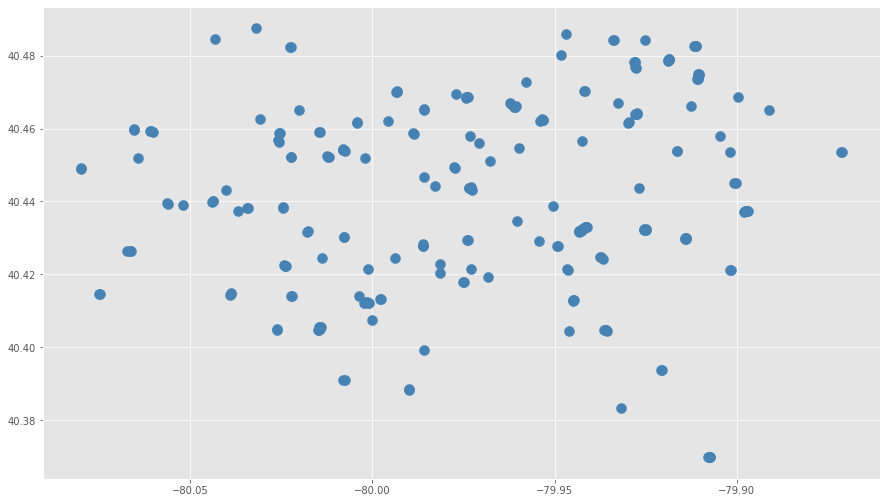

In [10]:
courtsnrinks['coordinates'] = courtsnrinks[['longitude','latitude']].values.tolist()
courtsnrinks['coordinates'] = courtsnrinks['coordinates'].apply(Point)

courtsnrinks_graph = gpd.GeoDataFrame(courtsnrinks, geometry = 'coordinates')
courtsnrinks_graph.plot(color='steelblue', figsize=(15,15), markersize=100)

That diagram is useless without a map behind it so let us add that. Each neighborhood has a different color.

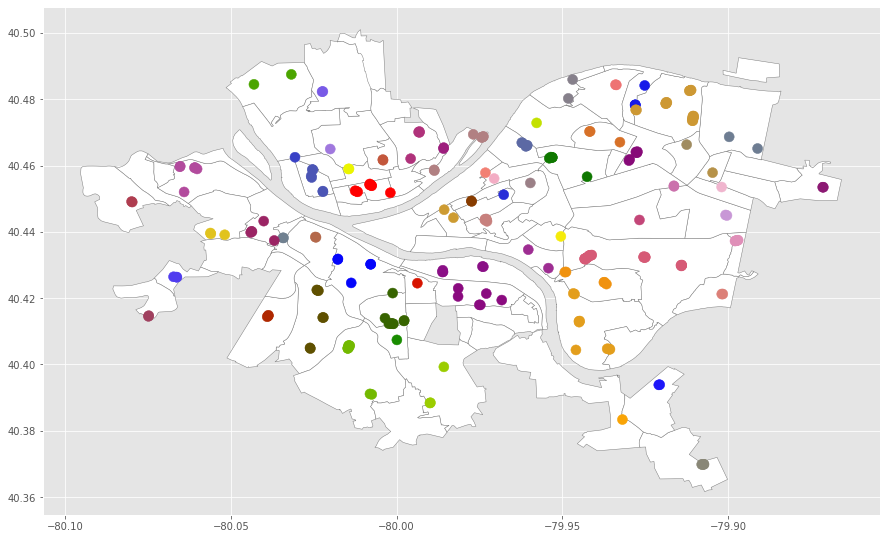

In [21]:
base = neighborhoods.plot(color='white', edgecolor='gray', figsize=(15,15))
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom blue', [(0,'red'), (0.10, 'green'), (0.20, 'yellow'), (0.30,'purple'), 
                                                         (0.40, 'orange'), (0.50, 'slategrey'), (0.60,'blue'), (0.70, 'pink'), 
                                                         (0.80, 'purple'), (0.90,'salmon'), (1, 'slategrey')], N=256)

courtsnrinks_graph.plot(ax=base, column='neighborhood', markersize=100, cmap=cmap)

cool!

*CONCLUSION*       
This information is than added into the final ranking dictionary.

In [12]:
finalscores = dict(courtsnrinks_series)

The 5 neighborhoods with the most courts and rinks are:
1. Squirrel Hill South (26 c/r)
2. Highland Park (20 c/r)
3. Hazelwood (10 c/r)
4. Beltzhoover (9 c/r)
5. Brookline (9 c/r)

In [13]:
courtsnrinks_series.sort_values(ascending=False)[:5]

Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
Name: Courts, dtype: int64

The top 5 neighborhood overall are currently in the same ranking as the list above.

**PART TWO: POOLS**

First we want to clean up the data. Here we iterate through the dataset to see which neighborhood had the greatest amount of pools. If the neighborhood name is not already in the dictionary, it gets added. If it is in there, the number associated with it increases by one.

In [14]:
for i in range(len(pools)):
    item = pools.loc[i, 'neighborhood']
    if item in pools_dict:
        pools_dict[item] += 1 
    else:
        pools_dict[item] = 1

Now we convert the dictionary into it's easier to use version, a series.

In [15]:
pool_series = pd.Series(pools_dict, name = "neighborhood")
pool_series.sort_values(ascending = False)[:10]

South Side Flats       2
Highland Park          2
Bedford Dwellings      1
South Side Slopes      1
Westwood               1
Polish Hill            1
Beltzhoover            1
Allegheny Center       1
Sheraden               1
Squirrel Hill South    1
Name: neighborhood, dtype: int64

Now we can put this data into a not so interesting bar graph.

Text(0, 0.5, '# of Pools')

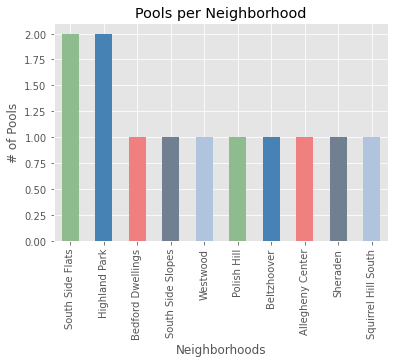

In [16]:
pool_series.sort_values(ascending=False)[:10].plot.bar(color=colors)
plt.title('Pools per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('# of Pools')

Since this data is not very useful, I decided to measure it by the size of the pool vs. the population. This makes it much more interesting and better to use.         
Here I am iterating through the pool data again, but adding the capacity size into it instead of the number of times that neighborhood appears.

In [17]:
for i in range(len(pools)):
    item = pools.loc[i, 'neighborhood']
    if item in poolscap_dict:
        poolscap_dict[item] += pools.loc[i, 'capacity']
    else:
        poolscap_dict[item] = pools.loc[i, 'capacity']

Then I turned it into a series.

In [18]:
poolcap_series = pd.Series(poolscap_dict, name = "neighborhood")
poolcap_series.sort_values(ascending = False)[:10]

Bedford Dwellings    538000.0
Brookline            417657.0
Mount Washington     356000.0
Bloomfield           335000.0
South Side Flats     312800.0
Sheraden             278000.0
Allegheny Center     271000.0
Carrick              224100.0
Polish Hill          215451.0
Brighton Heights     205800.0
Name: neighborhood, dtype: float64

Text(0, 0.5, 'Capacity (Liters)')

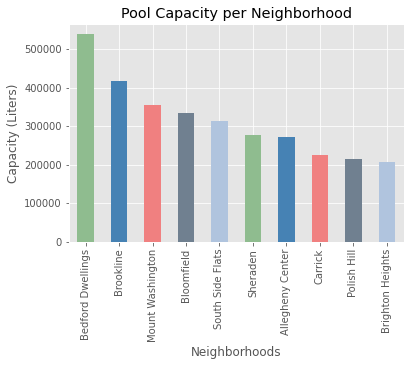

In [20]:
poolcap_series.sort_values(ascending=False)[:10].plot.bar(color=colors)
plt.title('Pool Capacity per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Capacity (Liters)')